In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
import scipy
%matplotlib inline

In [2]:
data = loadmat('data/ex8data1.mat')
X = data['X']
X.shape

(307, 2)

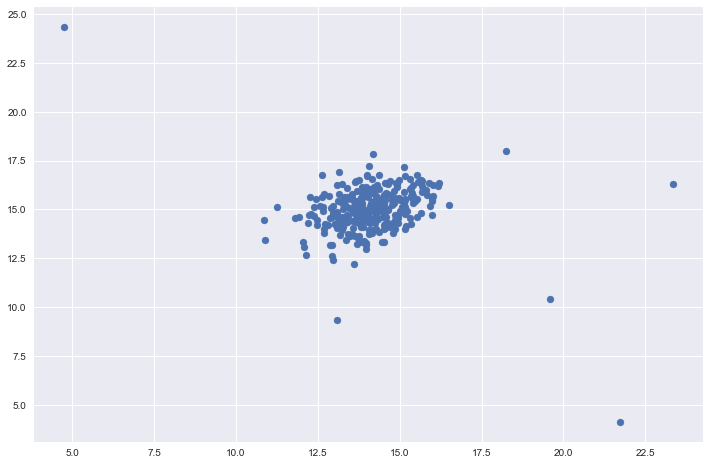

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

In [4]:
def estimateGaussian(X):
    m=X.shape[0]
    mu=np.zeros(shape=X.shape)
    sigma=np.zeros(shape=X.shape)
    
    mu=(1/m)*np.sum(X,axis=0)
    sigma=(1/m)*np.sum(np.power(X-mu,2),axis=0)
    
    return mu, sigma


In [5]:
mu, sigma = estimateGaussian(X)
mu, sigma

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [6]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [7]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])
dist.pdf(15)

0.19358750446150394

In [8]:
dist.pdf(X[:,0])[0:50]

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

In [9]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape

(307, 2)

In [10]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

pval.shape

(307, 2)

In [11]:
def selectThreshold(pval,yval):
    best_eps=0
    best_f1=0
    f1=0
    stepsize=(pval.max()-pval.min())/1000
    for epsilon in np.arange(pval.min(),pval.max(),stepsize):
        preds=pval<epsilon
        
        tp=np.sum(np.logical_and(preds==1,yval==1))
        fp=np.sum(np.logical_and(preds==1,yval==0))
        fn=np.sum(np.logical_and(preds==0,yval==1))
        
        prec=tp/(tp+fp)
        rec=tp/(tp+fn)
        f1=2*prec*rec/(prec+rec)
        
        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon
            
    return best_epsilon, best_f1

In [12]:
epsilon, f1 = selectThreshold(pval, yval)
epsilon, f1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


(0.0095667060059568404, 0.7142857142857143)

In [13]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

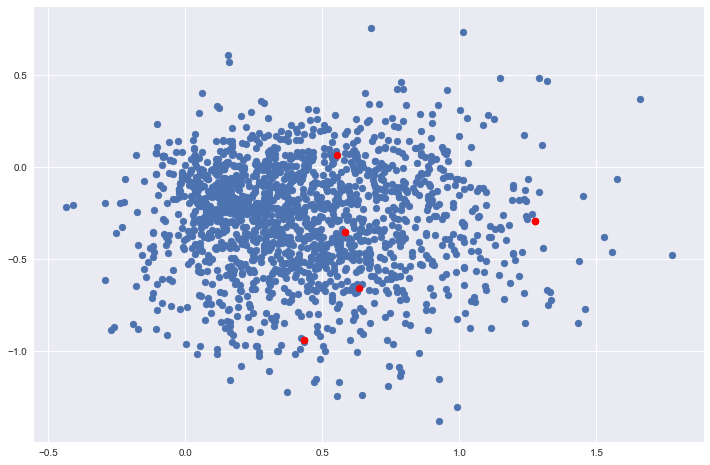

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')

In [163]:
data = loadmat('data/ex8_movies.mat')
data

{'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0'}

In [164]:
Y = data['Y']
R = data['R']
Y.shape, R.shape

((1682, 943), (1682, 943))

In [179]:
params_data = loadmat('data/ex8_movieParams.mat')
X = params_data['X']
Theta = params_data['Theta']

X.shape, Theta.shape

((1682, 10), (943, 10))

In [111]:
def cost(params,y,R,num_features):
    y=np.matrix(y)
    R=np.matrix(R)
    num_users=y.shape[1]
    num_movies=y.shape[0]
    
    X=np.matrix(np.reshape(params[:num_movies*num_features],(num_movies,num_features)))
    Theta=np.matrix(np.reshape(params[num_movies*num_features:],(num_users,num_features)))
    print(X.shape,Theta.shape,num_users,num_movies)
    H=np.dot(X,Theta.T)
    J=(1/2)*np.sum(np.power(np.multiply((H-y),R),2))
    
    return J

In [182]:
users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
Theta_sub = Theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

cost(params, Y_sub, R_sub, features), print(params.shape)

(27,)


((22.224603725685675,
  array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
           3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
          -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
          -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
           4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
          -3.47410789,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ])),
 None)

In [167]:
def cost(params,y,R,num_features):
    y=np.matrix(y)
    R=np.matrix(R)
    num_users=y.shape[1]
    num_movies=y.shape[0]

    X=np.matrix(np.reshape(params[:num_movies*num_features],(num_movies,num_features)))
    Theta=np.matrix(np.reshape(params[num_movies*num_features:],(num_users,num_features)))
    
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    H=np.dot(X,Theta.T)
    J=(1/2)*np.sum(np.power(np.multiply((H-y),R),2))
    
    Theta_grad=np.multiply(H-y,R).T*X
    X_grad=np.multiply(H-y,R)*Theta
    
    grad=np.concatenate((np.ravel(X_grad),np.ravel(Theta_grad)))
    
    return J, grad

In [168]:
J, grad = cost_reg(params, Y_sub, R_sub, features, 1.5)
J, grad

TypeError: 'numpy.float64' object is not iterable

In [169]:
def cost_reg(params,y,R,num_features,l_rate):
    y=np.matrix(y)
    R=np.matrix(R)
    num_users=y.shape[1]
    num_movies=y.shape[0]

    X=np.matrix(np.reshape(params[:num_movies*num_features],(num_movies,num_features)))
    Theta=np.matrix(np.reshape(params[num_movies*num_features:],(num_users,num_features)))
    
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    H=np.dot(X,Theta.T)
    J=(1/2)*np.sum(np.power(np.multiply((H-y),R),2))+np.multiply((l_rate/2),np.sum(np.power(Theta,2)))+np.multiply((l_rate/2),np.sum(np.power(X,2)))

    Theta_grad=np.multiply(H-y,R).T*X+np.multiply(l_rate,Theta)
    X_grad=np.multiply(H-y,R)*Theta+np.multiply(l_rate,X)
    
    grad=np.concatenate((np.ravel(X_grad),np.ravel(Theta_grad)))
    
    return J

In [178]:


def CheckGradient(params,Y,R,num_features,l_rate):
    y=np.matrix(Y)
    R=np.matrix(R)
    num_users=y.shape[1]
    num_movies=y.shape[0]
        
    myeps = 0.0001
    nparams = len(params)
    epsvec = np.zeros(nparams)
    mygrads = cofiGrad(params,y,R,num_features,l_rate)
    for i in range(10):
        idx = np.random.randint(0,nparams)
        epsvec[idx] = myeps
        loss1 = cost_reg(params-epsvec,Y,R,features,l_rate)
        loss2 = cost_reg(params+epsvec,Y,R,features,l_rate)
        mygrad = (loss2 - loss1) / (2*myeps)
        epsvec[idx] = 0
        print(mygrad, mygrads[idx],mygrad - mygrads[idx])
        
def cofiGrad(params,Y,R,features,l_rate):
    y=np.matrix(Y)
    R=np.matrix(R)
    num_users=y.shape[1]
    num_movies=y.shape[0]
    num_features=features
    X=np.matrix(np.reshape(params[:num_movies*num_features],(num_movies,num_features)))
    Theta=np.matrix(np.reshape(params[num_movies*num_features:],(num_users,num_features)))
    
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    H=np.dot(X,Theta.T)
    J=(1/2)*np.sum(np.power(np.multiply((H-y),R),2))+np.multiply((l_rate/2),np.sum(np.power(Theta,2)))+np.multiply((l_rate/2),np.sum(np.power(X,2)))

    Theta_grad=np.multiply(H-y,R).T*X+np.multiply(l_rate,Theta)
    X_grad=np.multiply(H-y,R)*Theta+np.multiply(l_rate,X)
    
    grad=np.concatenate((np.ravel(X_grad),np.ravel(Theta_grad)))
    
    return grad
    
CheckGradient(params,Y_sub,R_sub,features,0)

-0.383582784629 -0.383582784622 -6.67560451362e-12
-1.89979026137 -1.89979026139 1.39457334569e-11
-0.523398454959 -0.523398454967 7.51609885441e-12
0.0 0.0 0.0
-0.740408710787 -0.740408710778 -8.1964435239e-12
0.0 0.0 0.0
0.0 0.0 0.0
-3.05099006408 -3.05099006407 -3.65396601865e-12
-0.740408710787 -0.740408710778 -8.1964435239e-12
-2.52899164609 -2.52899164608 -8.99369467788e-12


In [153]:
movie_idx = {}
f = open('data/movie_ids.txt')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [154]:
# I'll re-read in the data because I shortened them earlier (to debug)
datafile = 'data/ex8_movies.mat'
mat = scipy.io.loadmat( datafile )
Y = mat['Y']
R = mat['R']
# We'll use 10 features

movies = Y.shape[0]  # 1682
users = Y.shape[1]  # 944
features = 10
learning_rate = 10.

X = np.random.random(size=(movies, features))
Theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(X), np.ravel(Theta)))

X.shape, Theta.shape, params.shape

((1682, 10), (943, 10), (26250,))

In [192]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))
def flattenParams(myX, myTheta):
    """
    Hand this function an X matrix and a Theta matrix and it will flatten
    it into into one long (nm*nf + nu*nf,1) shaped numpy array
    """
    return np.concatenate((myX.flatten(),myTheta.flatten()))

Ymean = np.sum(Y,axis=1)/np.sum(R,axis=1)
Ymean = Ymean.reshape((Ymean.shape[0],1))
Ynorm=Y-Ymean
l_rate=1.5
Ynorm.shape, Y.shape

((1682, 943), (1682, 943))

In [193]:
from scipy.optimize import minimize
datafile = 'data/ex8_movieParams.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']
Theta = mat['Theta']
nu = int(mat['num_users'])
nm = int(mat['num_movies'])
nf = int(mat['num_features'])
X = np.random.rand(nm,nf)
Theta = np.random.rand(nu,nf)
myflat = flattenParams(X, Theta)
print(myflat.shape)
fmin = scipy.optimize.fmin_cg(cost_reg, x0=params, fprime=cofiGrad, \
                               args=(Y,R,features,l_rate), \
                                maxiter=50,disp=True,full_output=True)
fmin

(26250,)


ValueError: cannot reshape array of size 21214 into shape (943,3)

In [136]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
Theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

X.shape, Theta.shape

((1682, 10), (943, 10))

In [143]:
predictions = X * Theta.T 
my_preds = predictions[:, -1] + Ymean
my_preds.shape

(1682, 1)

In [142]:
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

matrix([[ 5.26511508],
        [ 5.12751815],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ]])

In [139]:
idx = np.argsort(my_preds, axis=0)[::-1]
idx

matrix([[ 287],
        [  10],
        [1535],
        ..., 
        [1625],
        [1307],
        [1431]], dtype=int64)

In [141]:
print("Top 10 movie predictions:")
for i in range(10):
    j = int(idx[i])
    print('Predicted rating of {0} for movie {1}.'.format(str(float(my_preds[j])), movie_idx[j]))

Top 10 movie predictions:
Predicted rating of 5.265115080500814 for movie Scream (1996).
Predicted rating of 5.12751815104202 for movie Seven (Se7en) (1995).
Predicted rating of 5.000000001565185 for movie Aiqing wansui (1994).
Predicted rating of 5.0000000006127205 for movie Great Day in Harlem, A (1994).
Predicted rating of 5.000000000276762 for movie They Made Me a Criminal (1939).
Predicted rating of 5.000000000187927 for movie Saint of Fort Washington, The (1993).
Predicted rating of 5.00000000012093 for movie Santa with Muscles (1996).
Predicted rating of 5.000000000039587 for movie Marlene Dietrich: Shadow and Light (1996) .
Predicted rating of 4.999999999817987 for movie Entertaining Angels: The Dorothy Day Story (1996).
Predicted rating of 4.999999999793001 for movie Someone Else's America (1995).
